In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import torch

import FullRankRNN as rnn
import Reinforce as rln

In [38]:
scaling_factors = np.linspace(0.1, 1, 10)

for i, scaling_factor in enumerate(scaling_factors):
    
    reinforce = rln.REINFORCE(train_wi=False, train_wrec=False, name_load="models/FullRankRNN.pt")
    
    #print(reinforce.actor_network.wo)
    reinforce.actor_network.wo.data *= scaling_factor
    #print(reinforce.actor_network.wo)
    
    obs, rewards, actions, probs, log_probs, values, \
    trial_begins, gt, wrong_on_avarage = reinforce.experience(100)
    
    print(i+1,": The percentage of uncorrect answers with a scaling factor of %.1f is %i%%" %(scaling_factor, wrong_on_avarage*100))

1 : The percentage of uncorrect answers with a scaling factor of 0.1 is 45%
2 : The percentage of uncorrect answers with a scaling factor of 0.2 is 44%
3 : The percentage of uncorrect answers with a scaling factor of 0.3 is 28%
4 : The percentage of uncorrect answers with a scaling factor of 0.4 is 38%
5 : The percentage of uncorrect answers with a scaling factor of 0.5 is 28%
6 : The percentage of uncorrect answers with a scaling factor of 0.6 is 28%
7 : The percentage of uncorrect answers with a scaling factor of 0.7 is 24%
8 : The percentage of uncorrect answers with a scaling factor of 0.8 is 25%
9 : The percentage of uncorrect answers with a scaling factor of 0.9 is 21%
10 : The percentage of uncorrect answers with a scaling factor of 1.0 is 20%


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

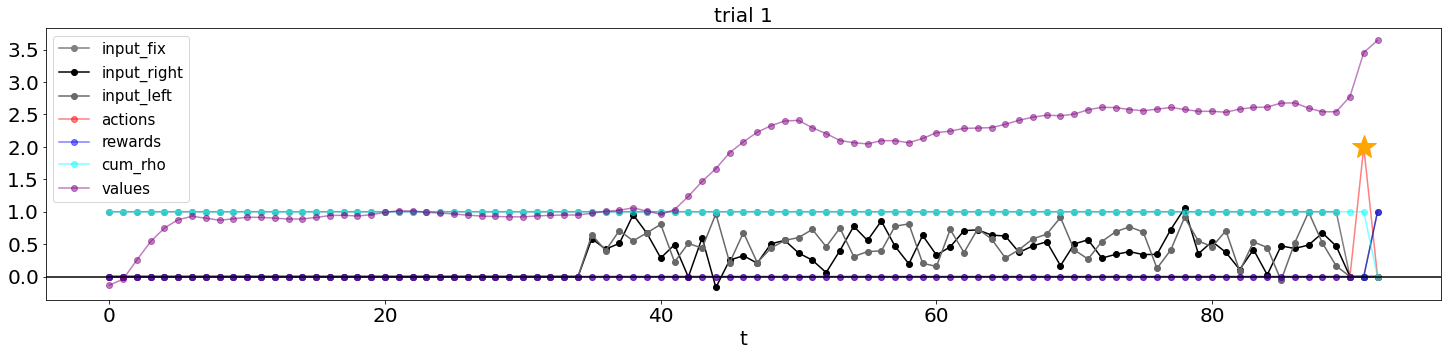

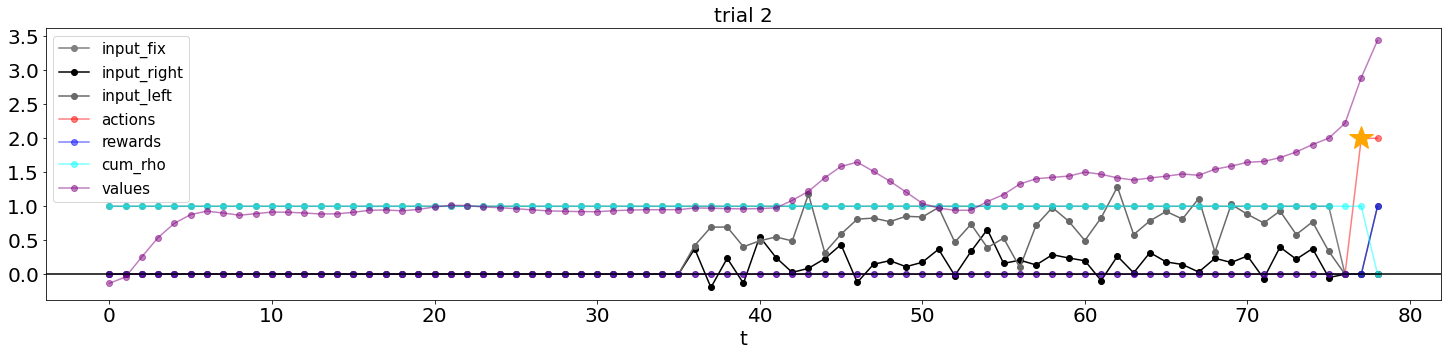

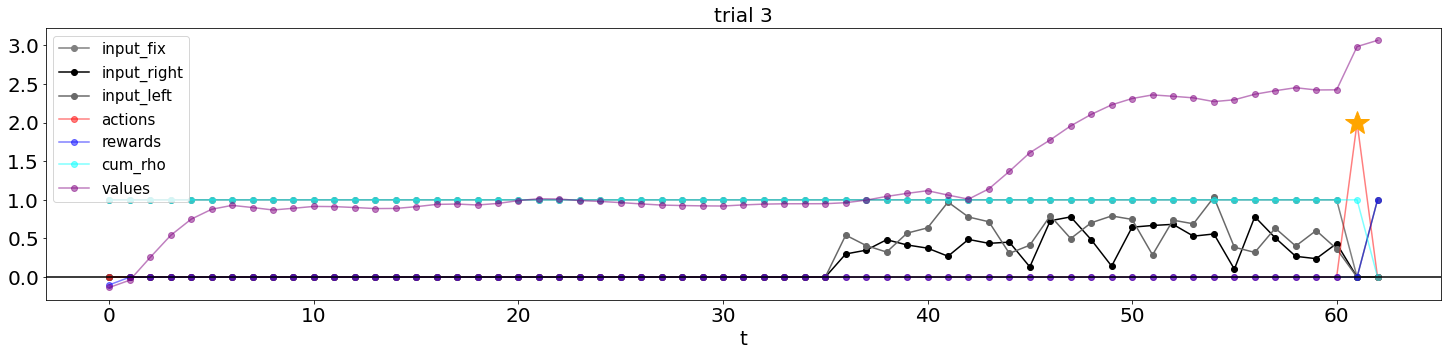

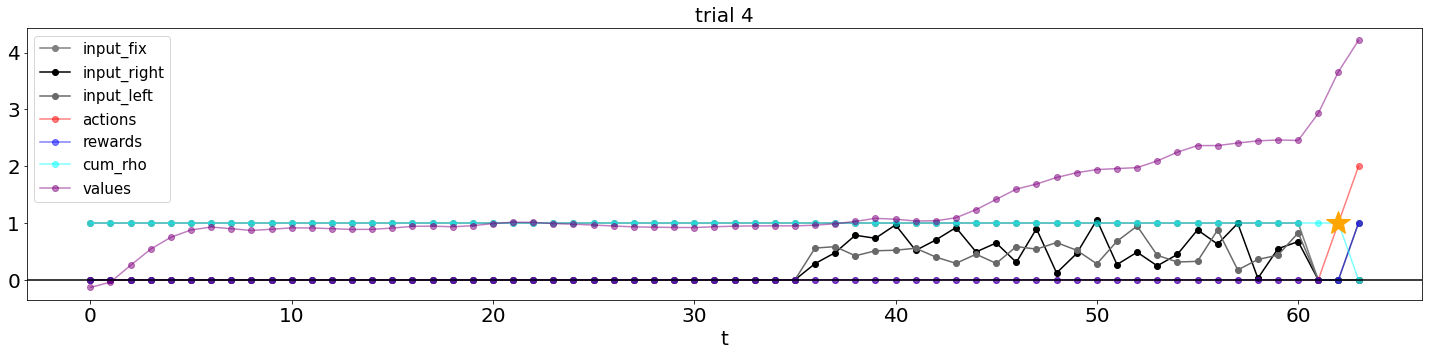

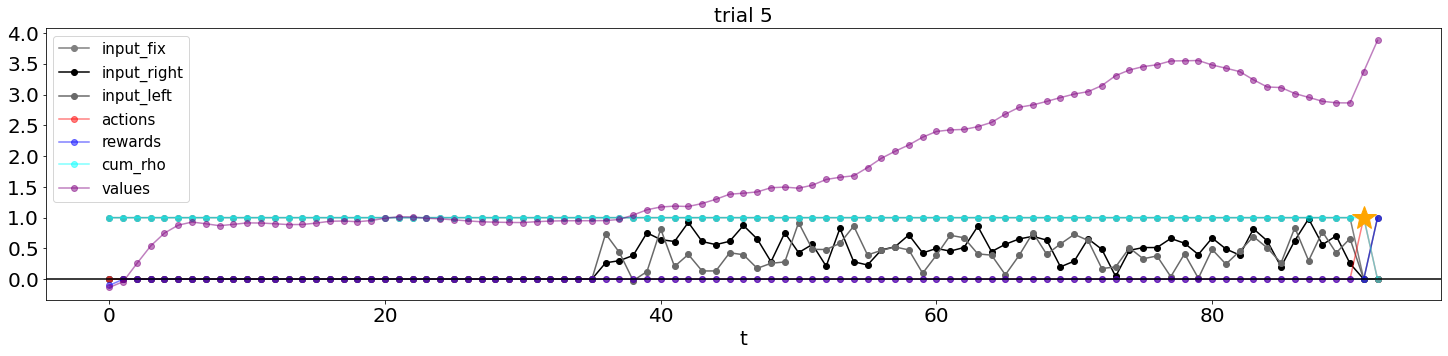

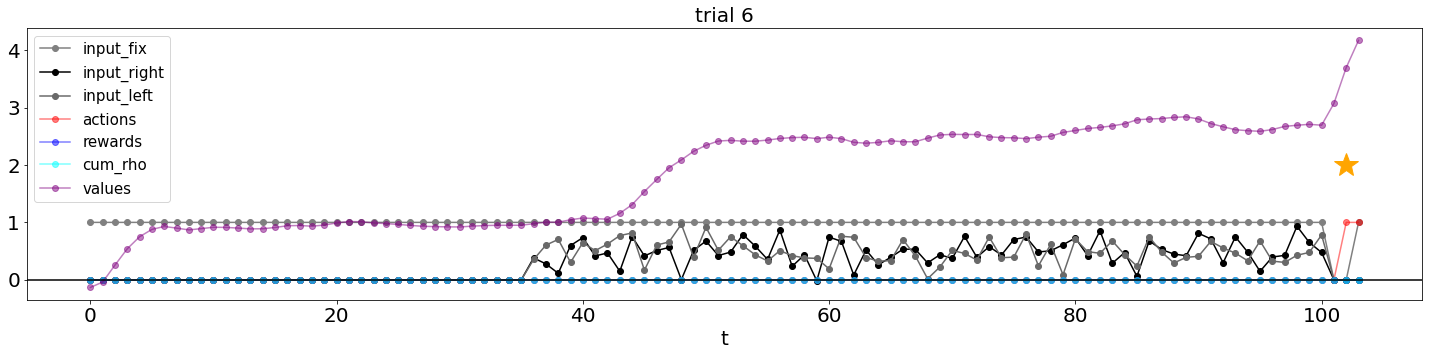

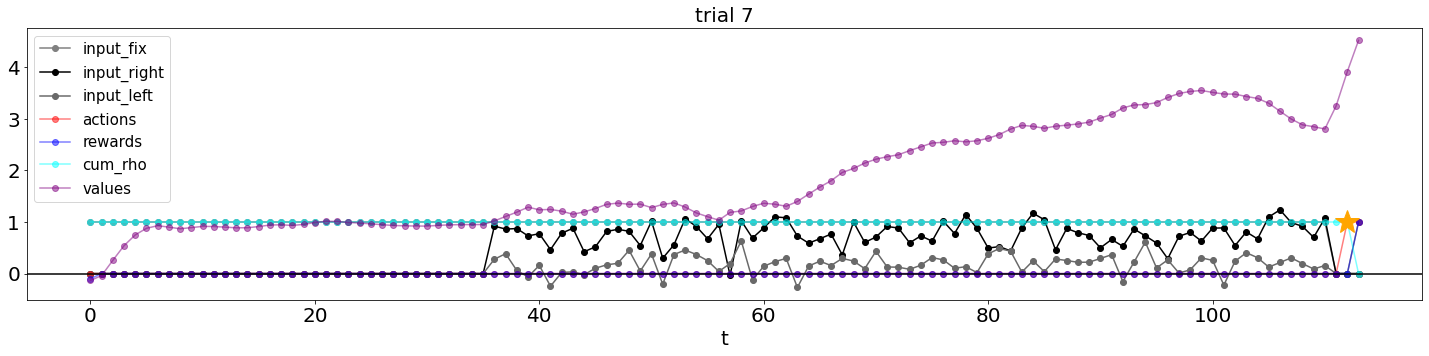

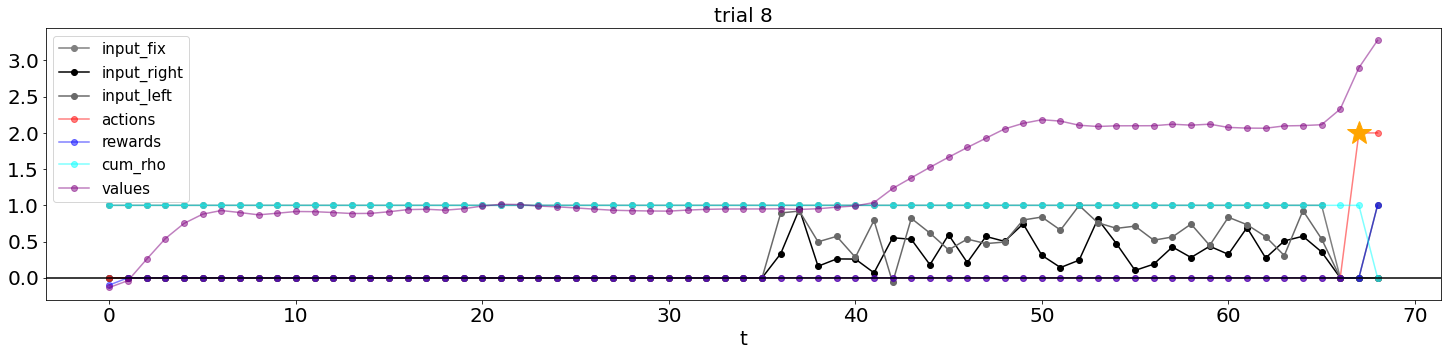

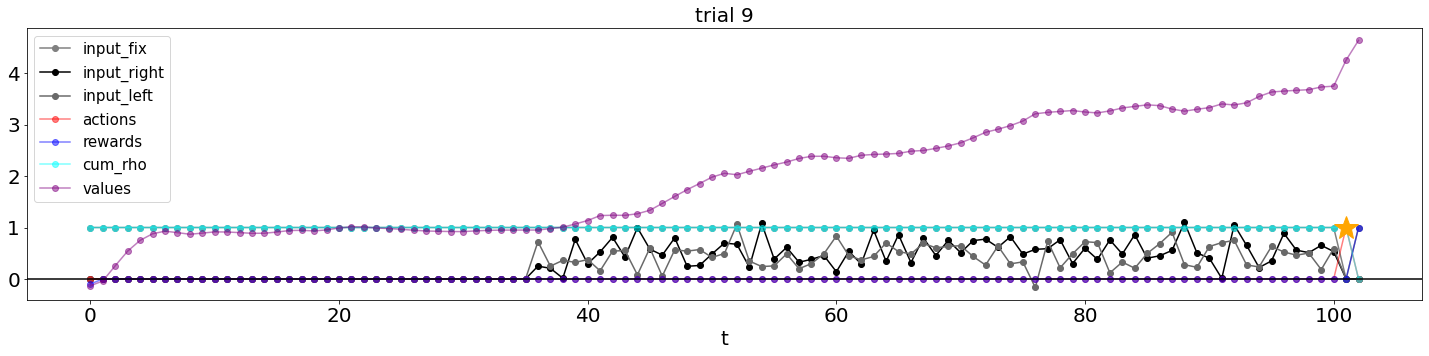

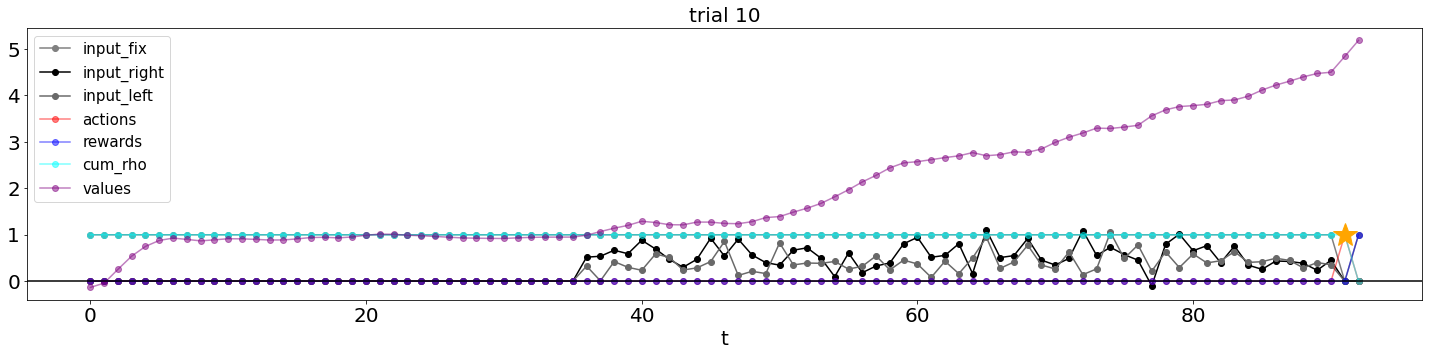

In [8]:
#torch.autograd.set_detect_anomaly(True)
importlib.reload(rln)
reinforce2 = rln.REINFORCE(name_load="models/FullRankRNN.pt") #train_wi_a=False, train_wrec_a=False, train_wo_a=False)
#reinforce2.actor_network.wo.data *= 1
iterations = 100
actor_rewards2, critic_losses2, errors2 = reinforce2.training(n_trs=10, iterations=iterations, lr_a=1e-4, lr_c=1e-4)

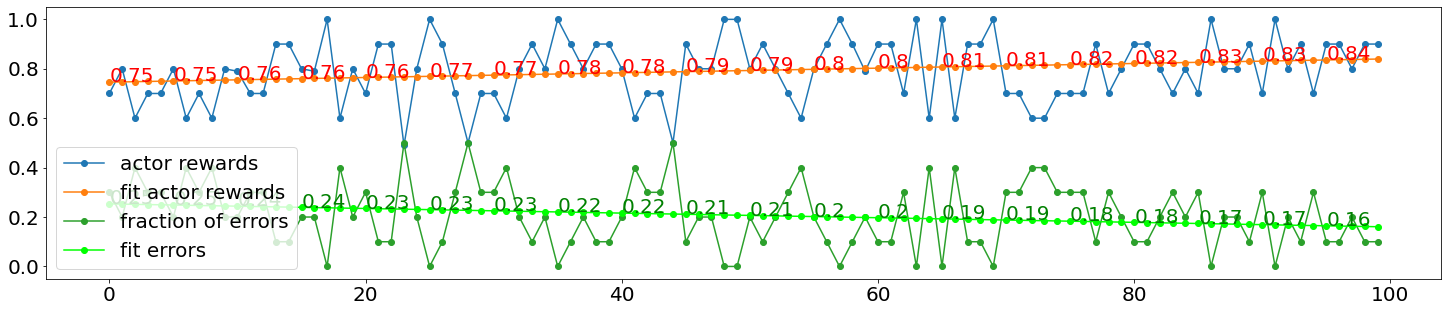

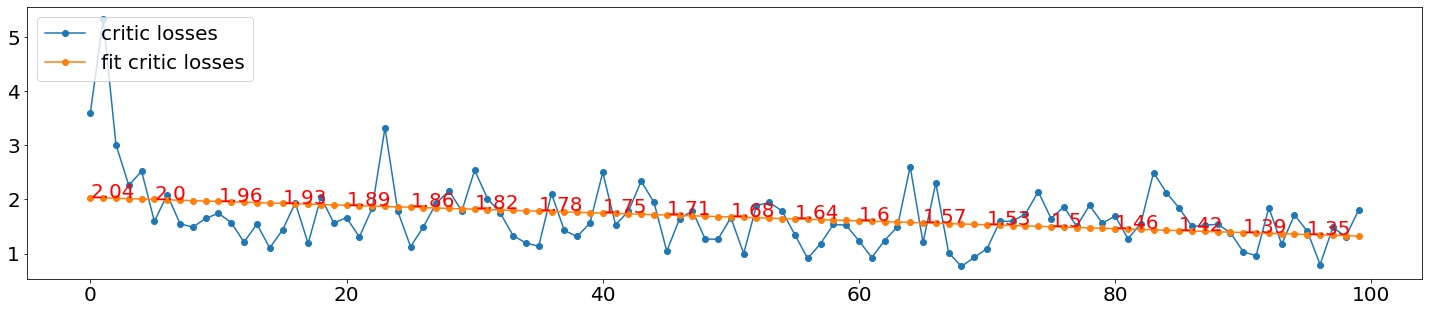

In [9]:
plt.figure(figsize=(25,5))

length = np.linspace(0,iterations-1,iterations)
fit = np.polyfit(length, actor_rewards2, 1)
fit3 = np.polyfit(length, errors2, 1)

plt.plot(length, actor_rewards2, "-o", label="actor rewards")
plt.plot(length, fit[1]+length*fit[0], "-o", label="fit actor rewards")
plt.plot(length, errors2, "-o", label="fraction of errors")
plt.plot(length, fit3[1]+length*fit3[0], "-o", label="fit errors", color="lime")

for i in range(int(len(errors2)/5)):
    plt.text(length[5*i], fit[1]+length[5*i]*fit[0], str(round(fit[1]+length[5*i]*fit[0], 2)), fontsize=20, color="red")
    plt.text(length[5*i], fit3[1]+length[5*i]*fit3[0], str(round(fit3[1]+length[5*i]*fit3[0], 2)), fontsize=20, color="green")
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20, loc="lower left");


plt.figure(figsize=(25,5))

length = np.linspace(0,iterations-1,iterations)
fit2 = np.polyfit(length, critic_losses2, 1)

plt.plot(length, critic_losses2, "-o", label="critic losses")
plt.plot(length, fit2[1]+length*fit2[0], "-o", label="fit critic losses")

for i in range(int(len(errors2)/5)):
    plt.text(length[5*i], fit2[1]+length[5*i]*fit2[0], str(round(fit2[1]+length[5*i]*fit2[0], 2)), fontsize=20, color="red")

plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20, loc="upper left");

In [37]:
#importlib.reload(rln)
#reinforce2 = rln.REINFORCE(name_load="models/FullRankRNN.pt")
observations, rewards, actions, log_probs, values, trial_begins, gt, coh, avarage_error = reinforce2.experience(50)
obs = observations.T

In [38]:
positive_coh = []
negative_coh = []
saved_index = []

for i in range(50):
    
    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])
    
    if len(actions[start:stop]) >= 80 and i < 49:
        if gt[i] == 1:
            positive_coh.append(i)
        else:
            negative_coh.append(i)
            
print(positive_coh, negative_coh)

for i in range(len(positive_coh)):
    if coh[positive_coh[i]] == 0:
        p_0 = positive_coh[i]
    elif coh[positive_coh[i]] == 6.4:
        p_6 = positive_coh[i]
    elif coh[positive_coh[i]] == 12.8:
        p_12 = positive_coh[i]
    elif coh[positive_coh[i]] == 25.6:
        p_25 = positive_coh[i]
    elif coh[positive_coh[i]] == 51.2:
        p_51 = positive_coh[i]
        
for i in range(len(negative_coh)):
    if coh[negative_coh[i]] == 0:
        n_0 = negative_coh[i]
    elif coh[negative_coh[i]] == 6.4:
        n_6 = negative_coh[i]
    elif coh[negative_coh[i]] == 12.8:
        n_12 = negative_coh[i]
    elif coh[negative_coh[i]] == 25.6:
        n_25 = negative_coh[i]
    elif coh[negative_coh[i]] == 51.2:
        n_51 = negative_coh[i]

saved_index=np.array([p_0,p_6,p_12,p_25,p_51,n_0,n_6,n_12,n_25,n_51])

print(p_0,p_6,p_12,p_25,p_51)
print(n_0,n_6,n_12,n_25,n_51)
print(saved_index)

[1, 4, 6, 10, 11, 12, 15, 27, 31, 38, 42, 47] [3, 9, 26, 28, 29, 34, 36, 37, 40, 43, 48]
42 27 10 38 47
48 36 37 37 43
[42 27 10 38 47 48 36 37 37 43]


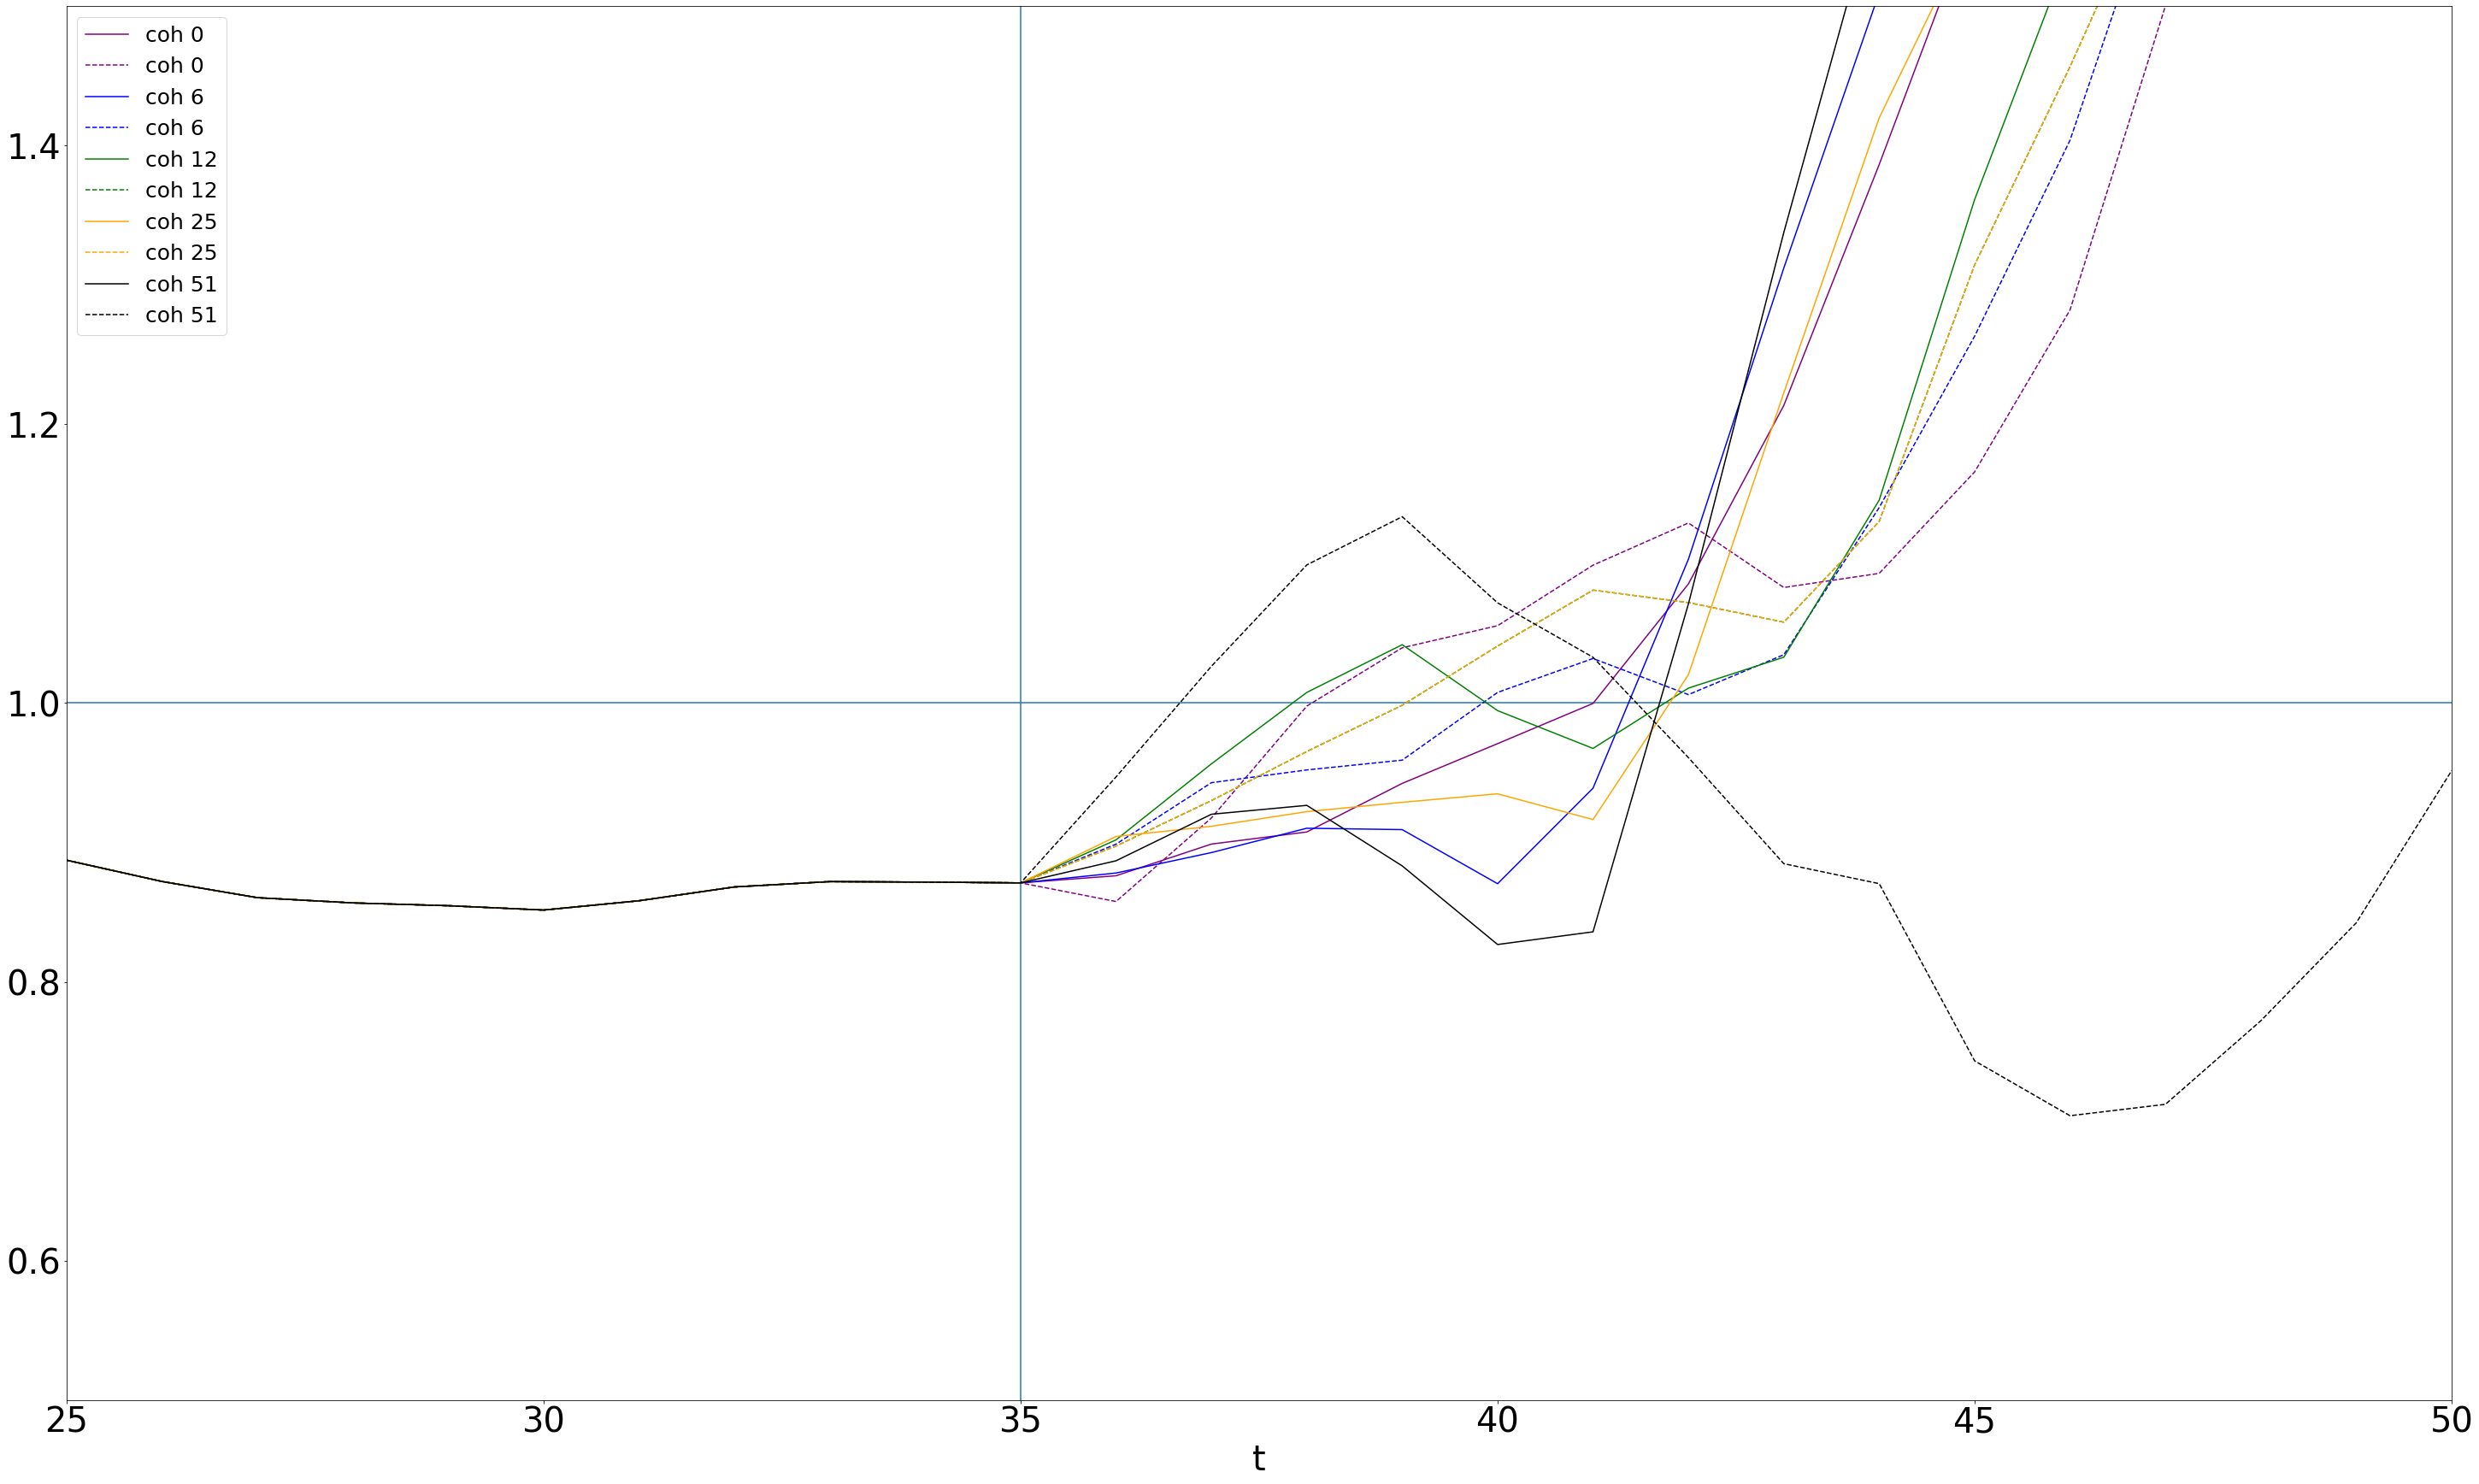

In [39]:
plt.figure(figsize=(50,30))

plt.axvline(35)
plt.axhline(1)
plt.plot(values.clone().detach().numpy()[trial_begins[p_0]:trial_begins[p_0+1]], "-", label="coh 0", color="purple")
plt.plot(values.clone().detach().numpy()[trial_begins[n_0]:trial_begins[n_0+1]], "--", label="coh 0", color="purple")
plt.plot(values.clone().detach().numpy()[trial_begins[p_6]:trial_begins[p_6+1]], "-", label="coh 6", color="blue")
plt.plot(values.clone().detach().numpy()[trial_begins[n_6]:trial_begins[n_6+1]], "--", label="coh 6", color="blue")
plt.plot(values.clone().detach().numpy()[trial_begins[p_12]:trial_begins[p_12+1]], "-", label="coh 12", color="green")
plt.plot(values.clone().detach().numpy()[trial_begins[n_12]:trial_begins[n_12+1]], "--", label="coh 12", color="green")
plt.plot(values.clone().detach().numpy()[trial_begins[p_25]:trial_begins[p_25+1]], "-", label="coh 25", color="orange")
plt.plot(values.clone().detach().numpy()[trial_begins[n_25]:trial_begins[n_25+1]], "--", label="coh 25", color="orange")
plt.plot(values.clone().detach().numpy()[trial_begins[p_51]:trial_begins[p_51+1]], "-", label="coh 51", color="black")
plt.plot(values.clone().detach().numpy()[trial_begins[n_51]:trial_begins[n_51+1]], "--", label="coh 51", color="black")
plt.xlim(25,50)
plt.ylim(0.5,1.5)
plt.xlabel("t", size=40)
plt.xticks(size=40)
plt.yticks(size=40)
plt.legend(fontsize=25, loc="upper left");

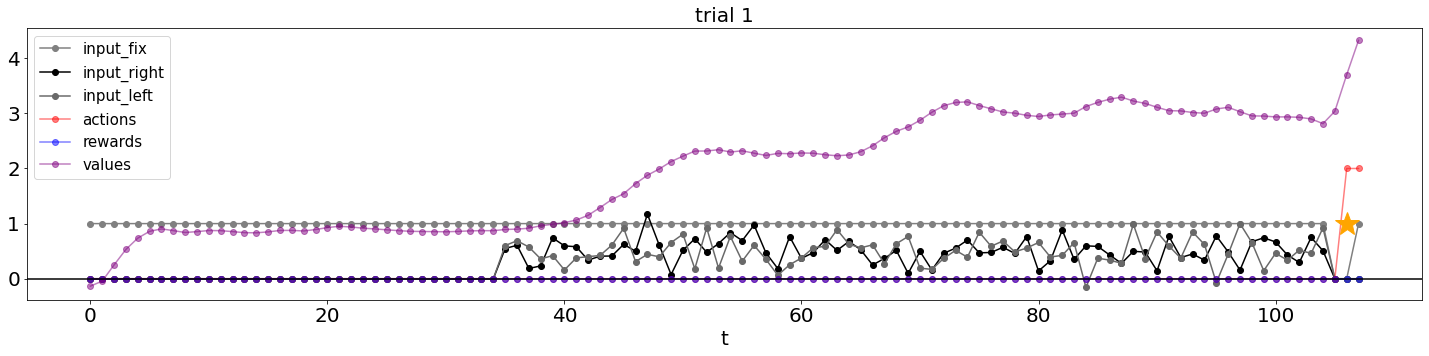

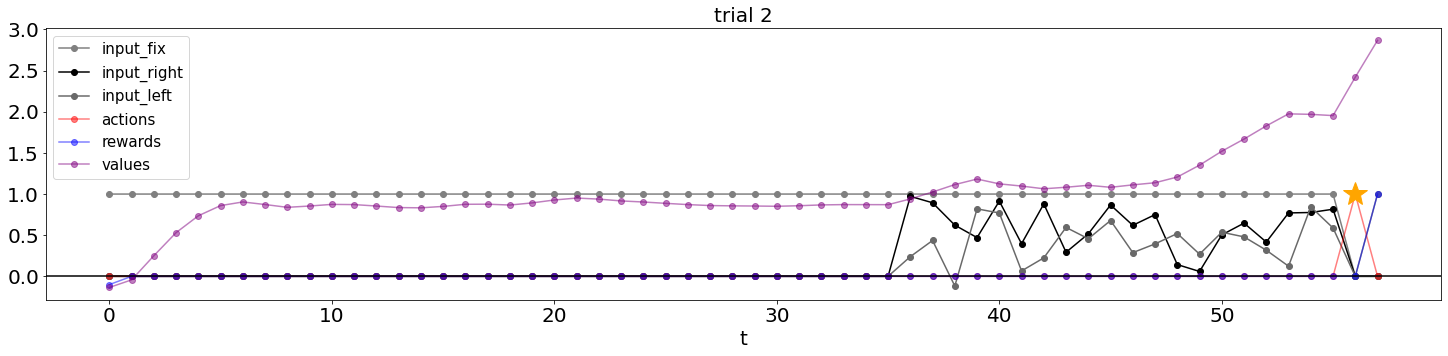

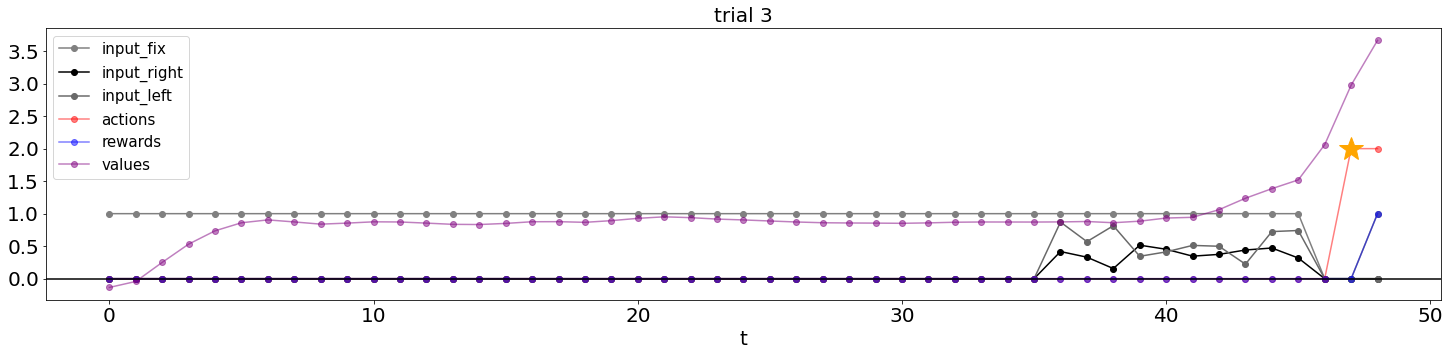

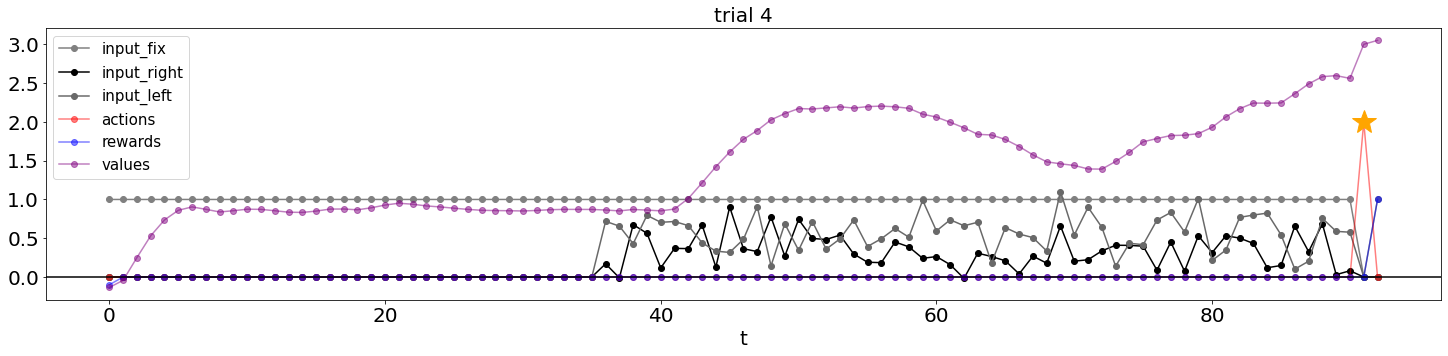

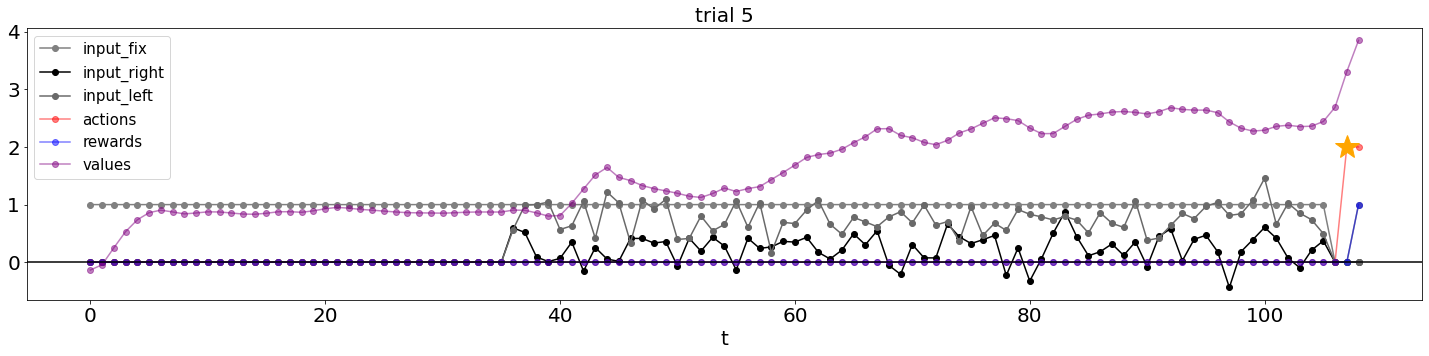

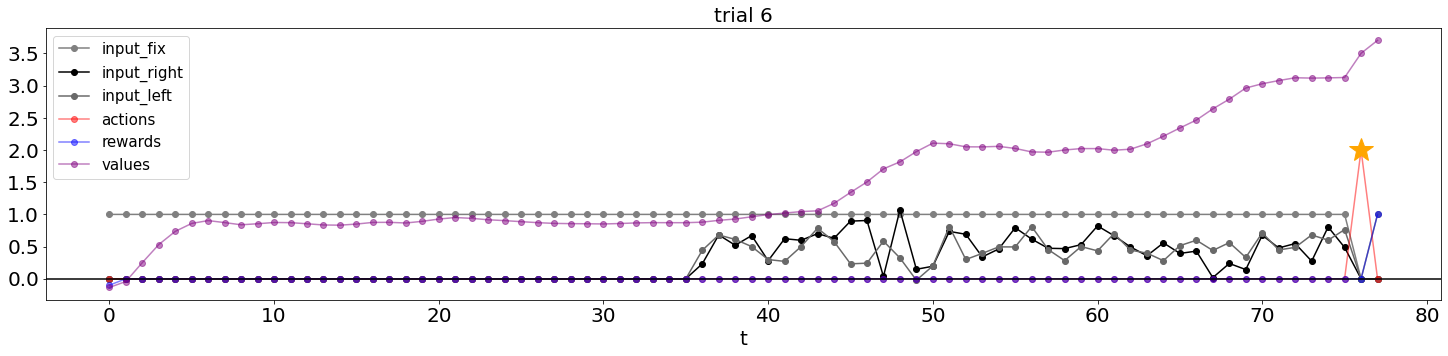

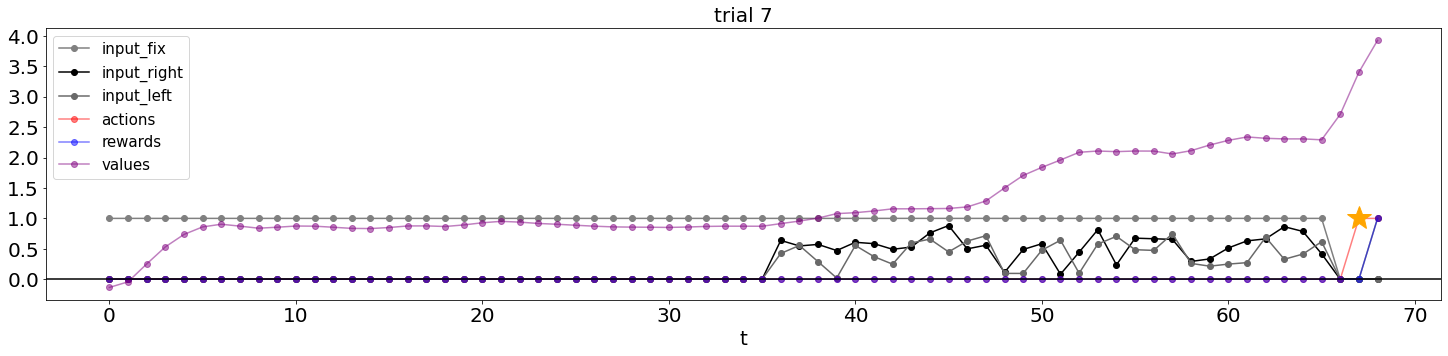

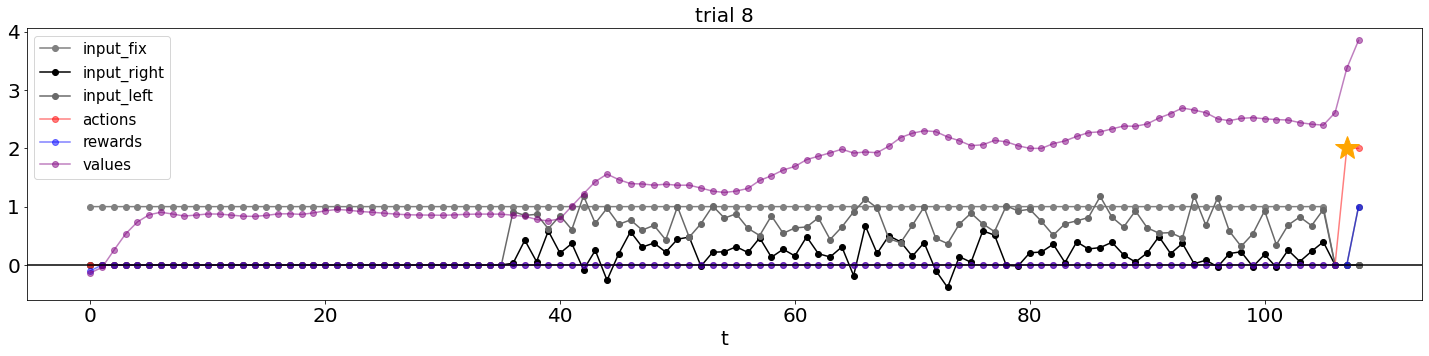

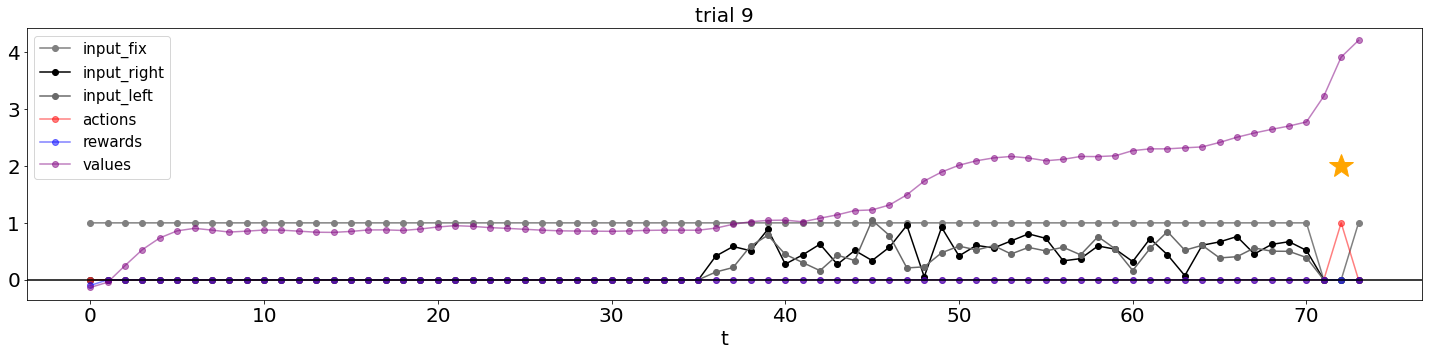

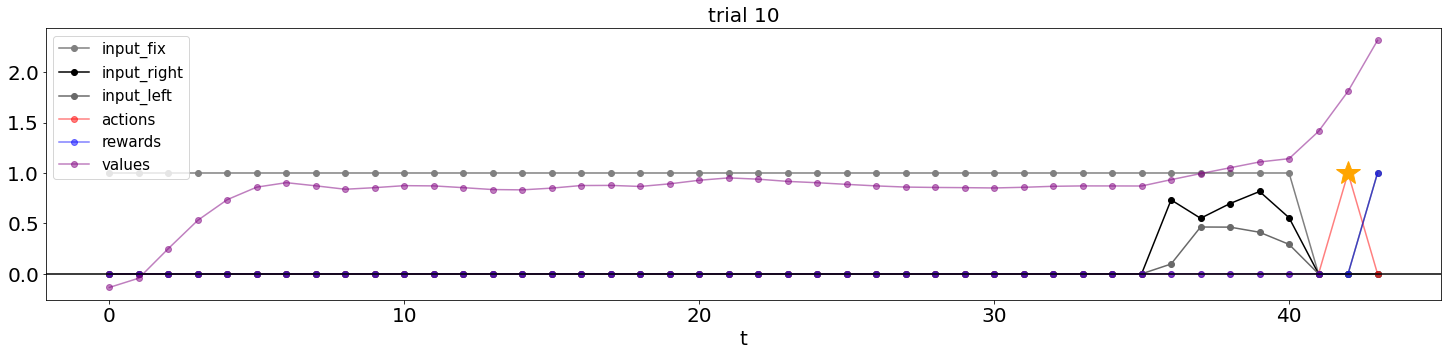

In [13]:
length = 0
for i in range(10):

    plt.figure(figsize=(25,5))

    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])

    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="input_right", color="black")
    plt.plot(obs[2][start:stop], "-o", label="input_left", color="dimgray")
    plt.plot(actions[start:stop], "-o", label="actions", color="red", alpha=0.5)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="blue", alpha=0.5)
    #plt.plot(cum_rho[start:stop], "-o", label="cum_rho", color="cyan", alpha=0.5)
    plt.plot(values.clone().detach().numpy()[start:stop], "-o", label="values", color="purple", alpha=0.5)
    plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    plt.axhline(0, color="black")
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    plt.legend(fontsize=15, loc="upper left");

iteration 1
It took 8.64 s for 1 iterations

It took 7.22 s on average for each 15-trails iteration



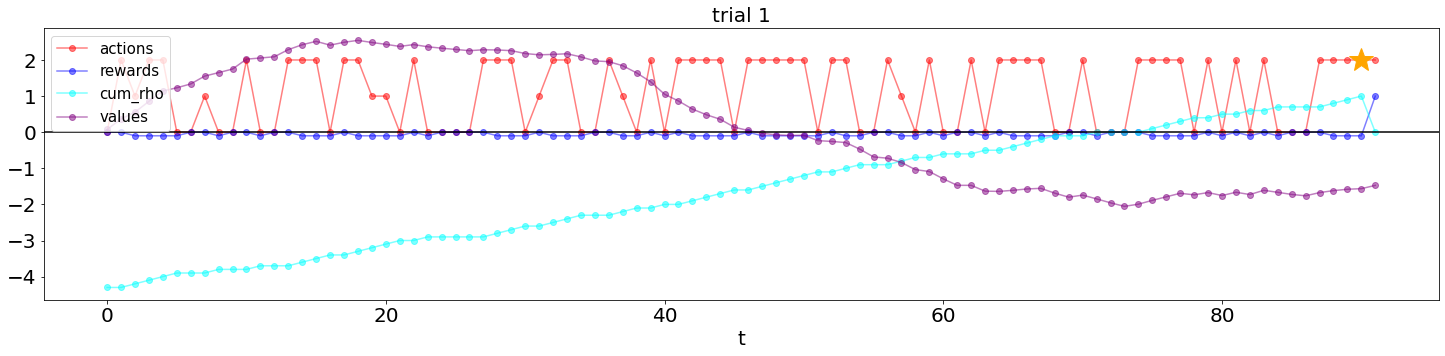

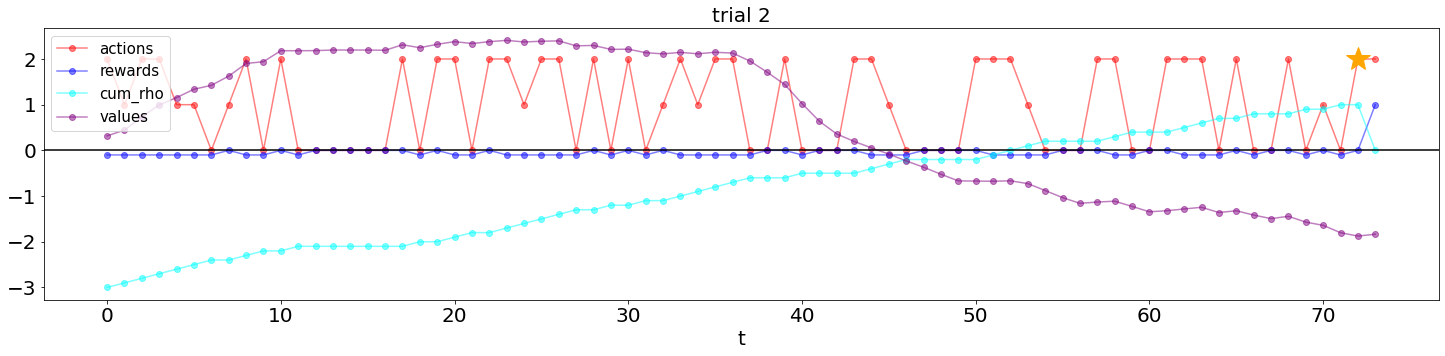

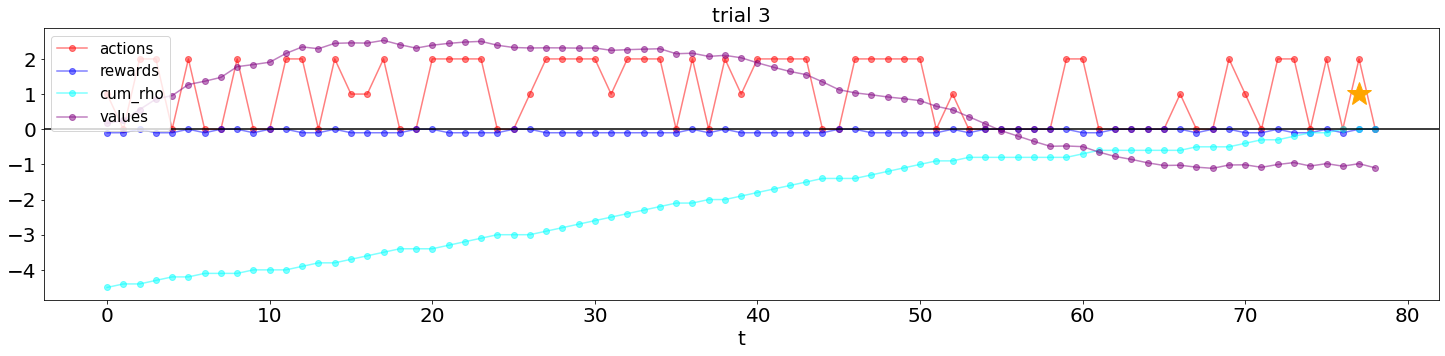

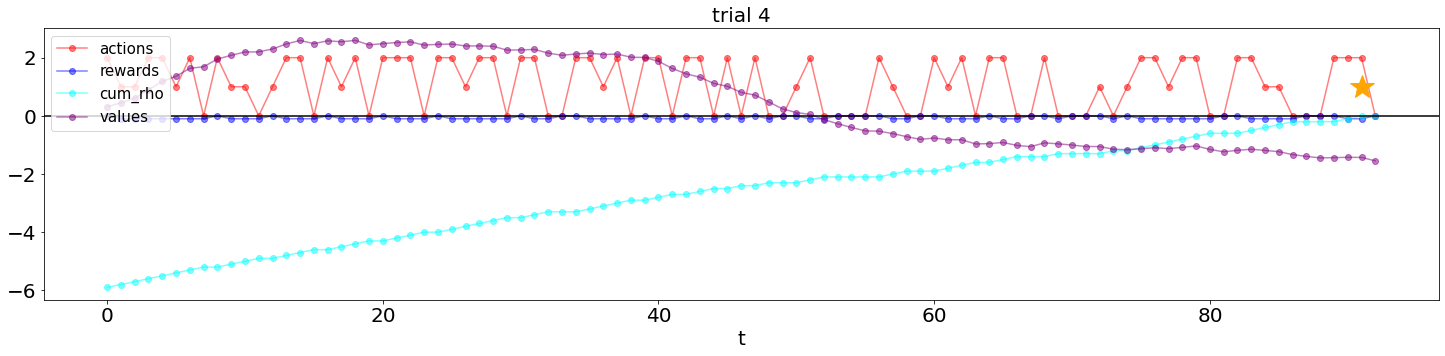

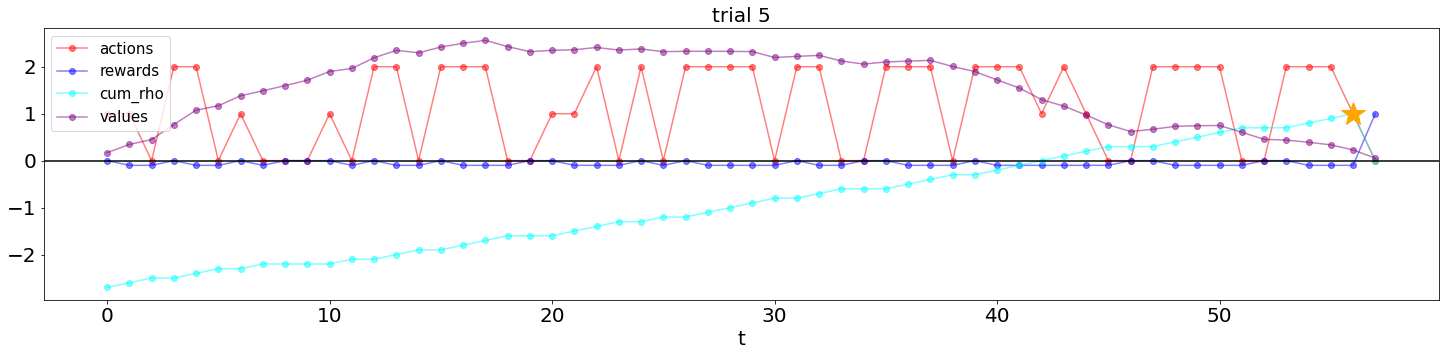

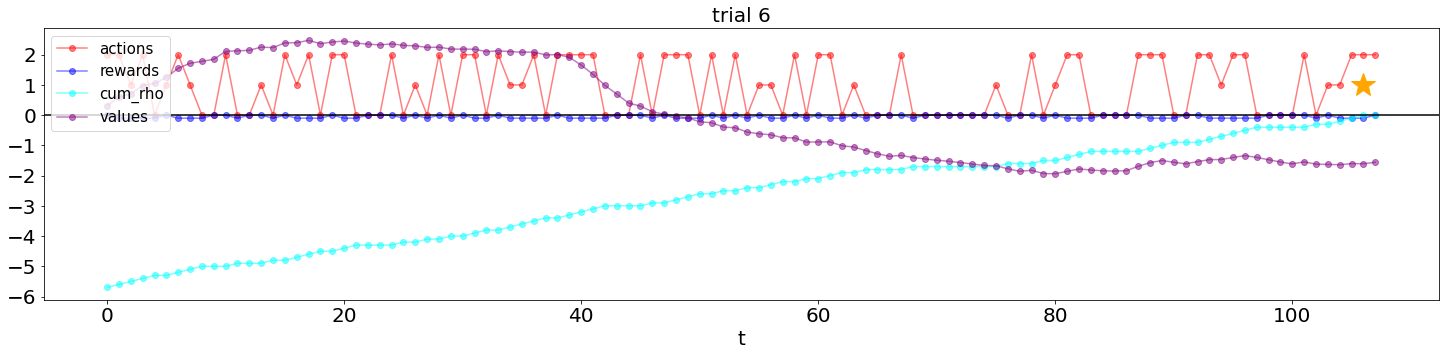

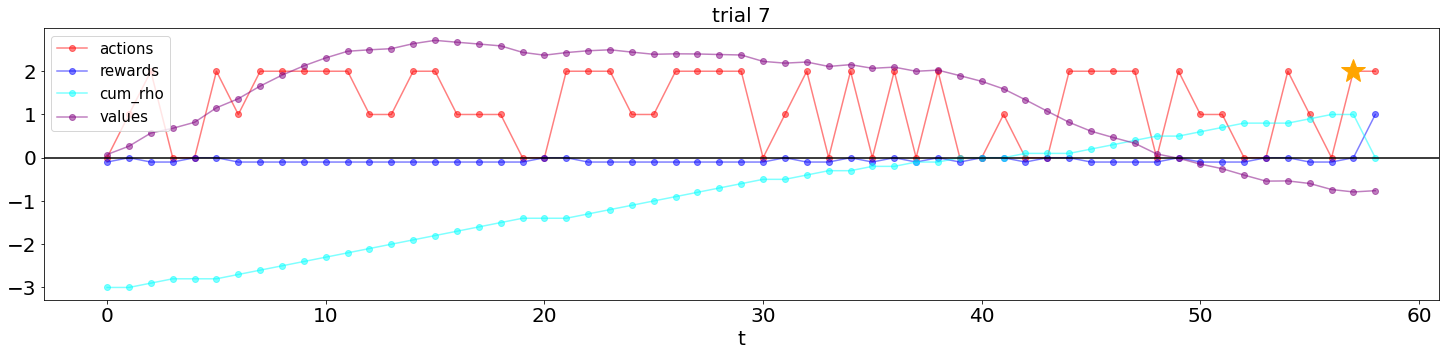

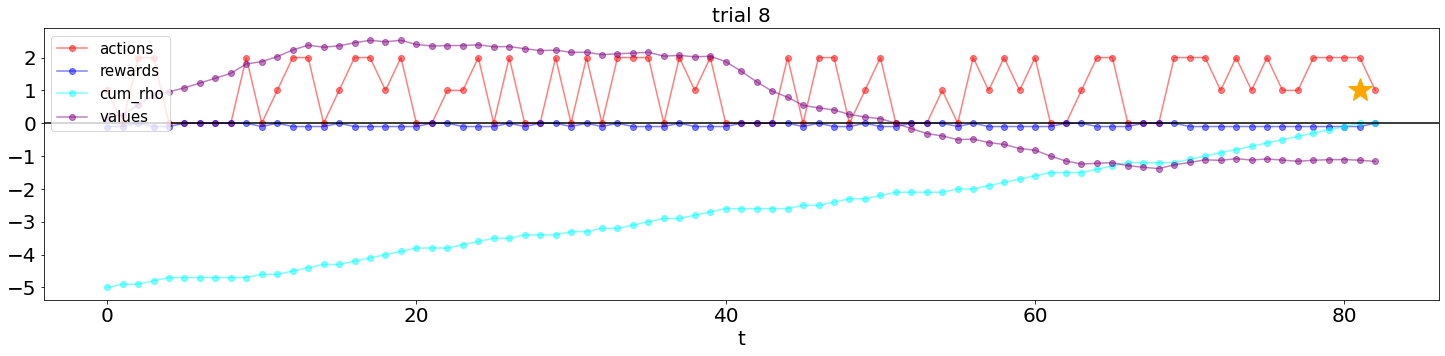

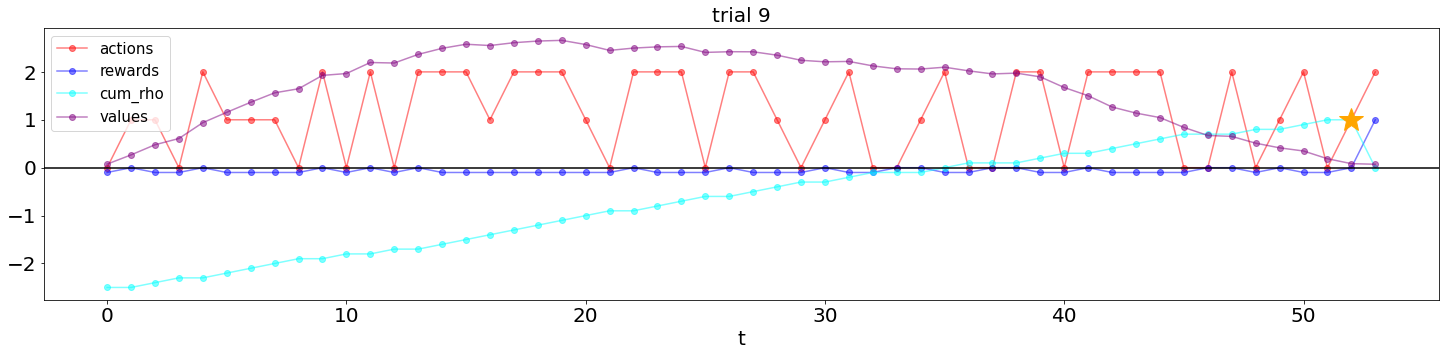

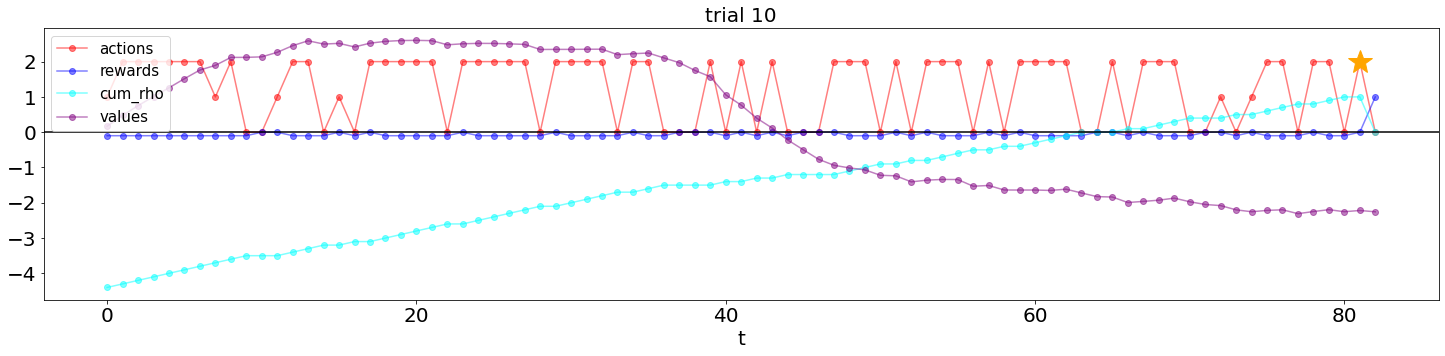

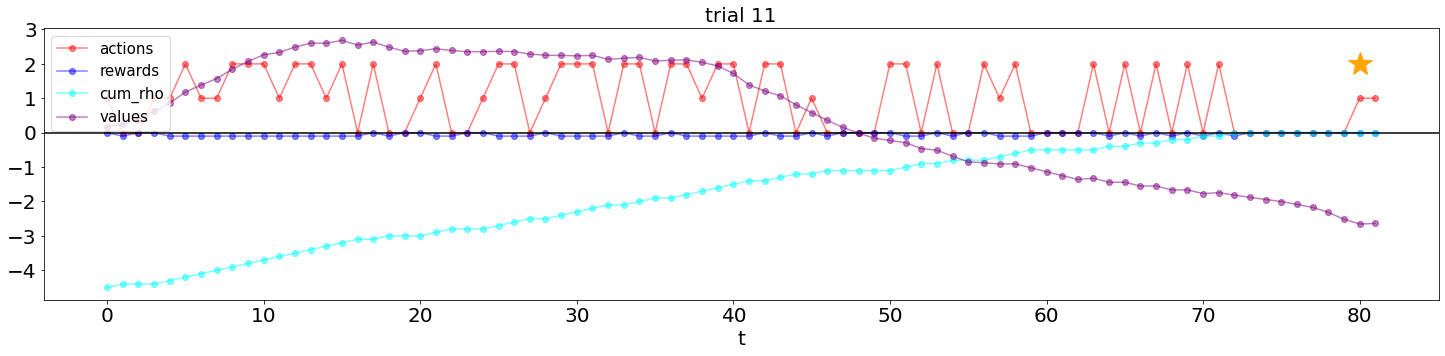

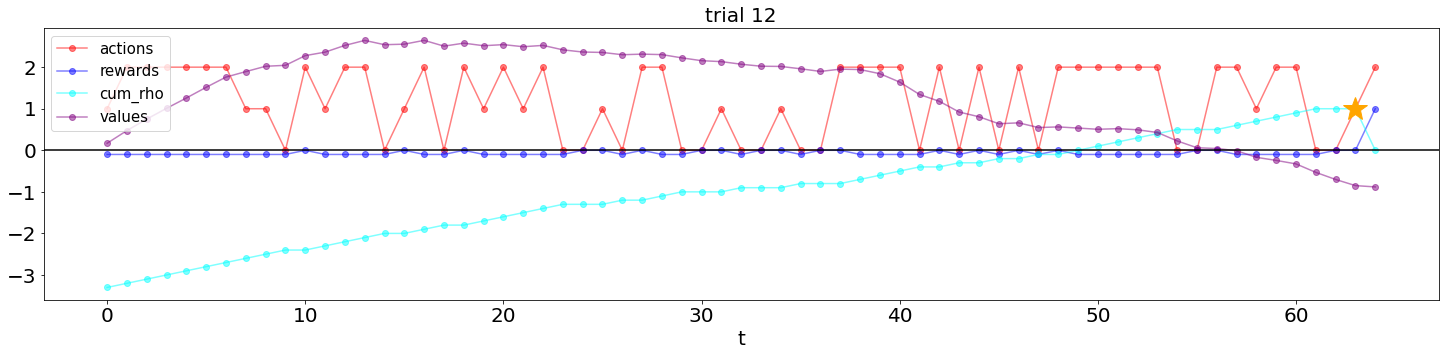

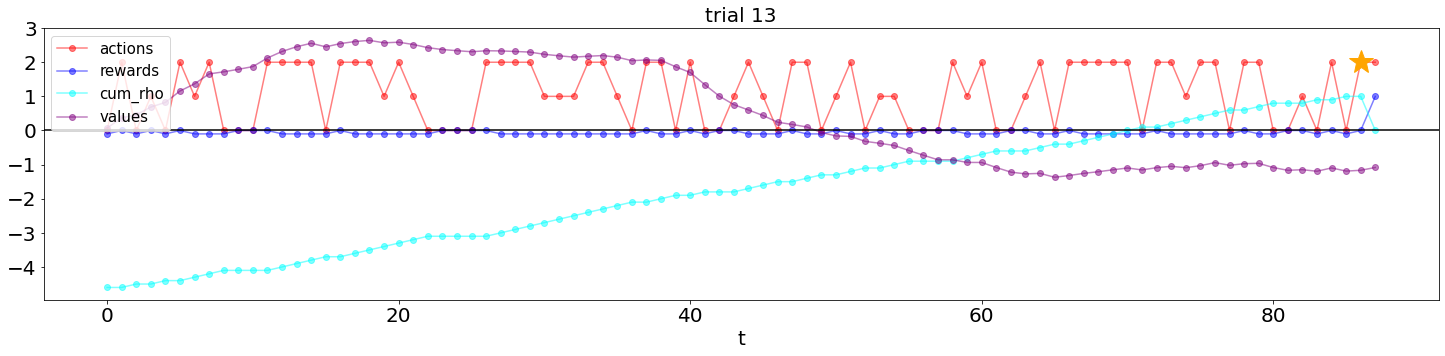

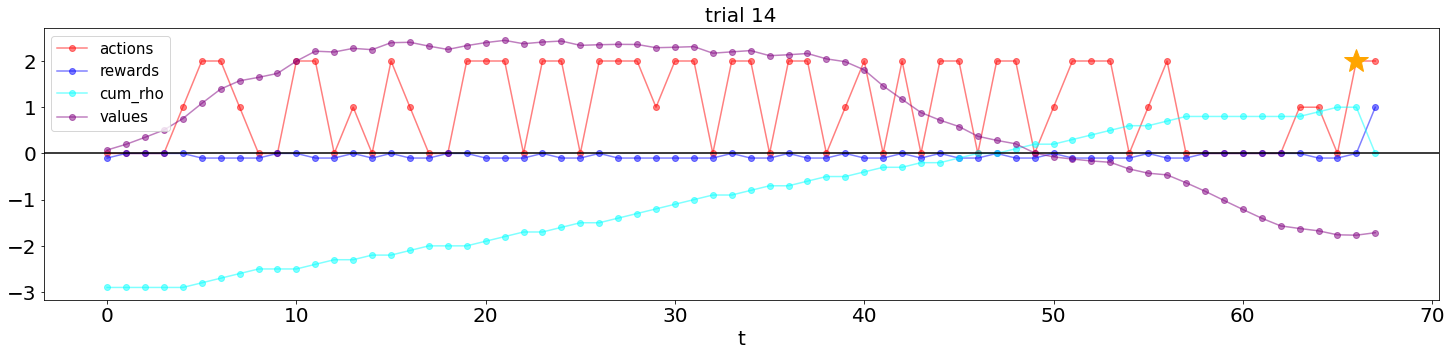

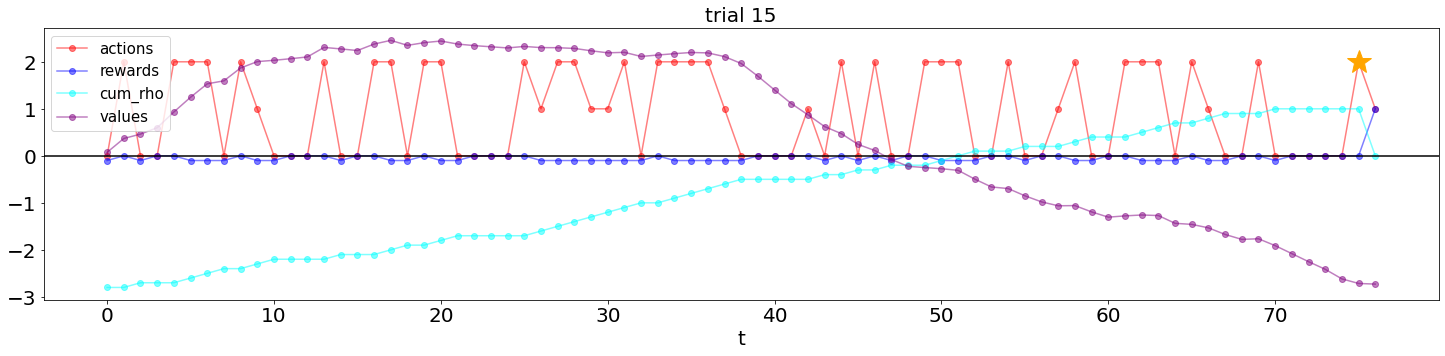

In [33]:
#torch.autograd.set_detect_anomaly(True)
importlib.reload(rln)
reinforce2 = rln.REINFORCE() #train_wi_a=False, train_wrec_a=False, train_wo_a=False)
reinforce2.actor_network.wo.data *= 1
iterations = 1
actor_rewards2, critic_losses2, errors2 = reinforce2.training(n_trs=15, iterations=iterations, lr_a=1e-4, lr_c=1e-4)

In [18]:
obs, rewards, actions, log_probs, values, trial_begins, gt, avarage_error = reinforce2.experience(10)
obs = obs.T

[0, 44, 143, 256, 314, 372, 450, 523, 611, 702, 785]


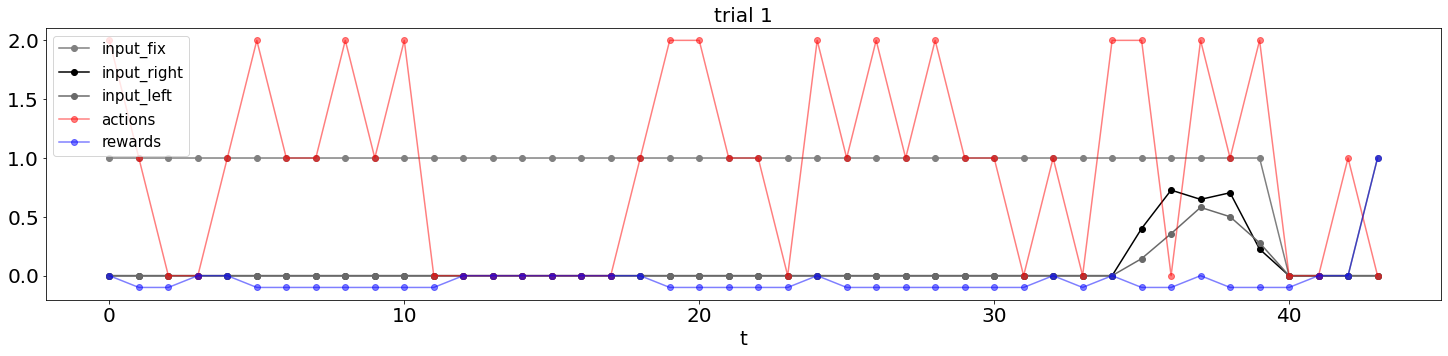

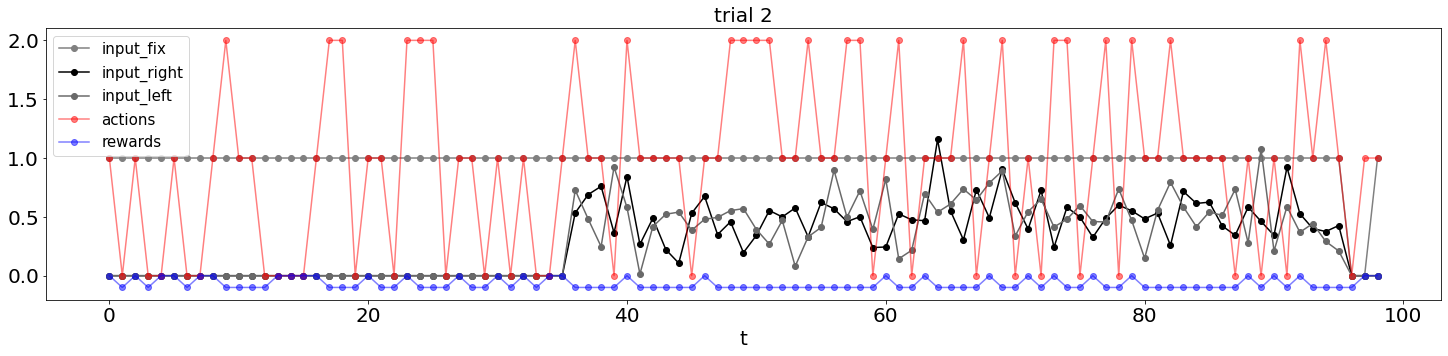

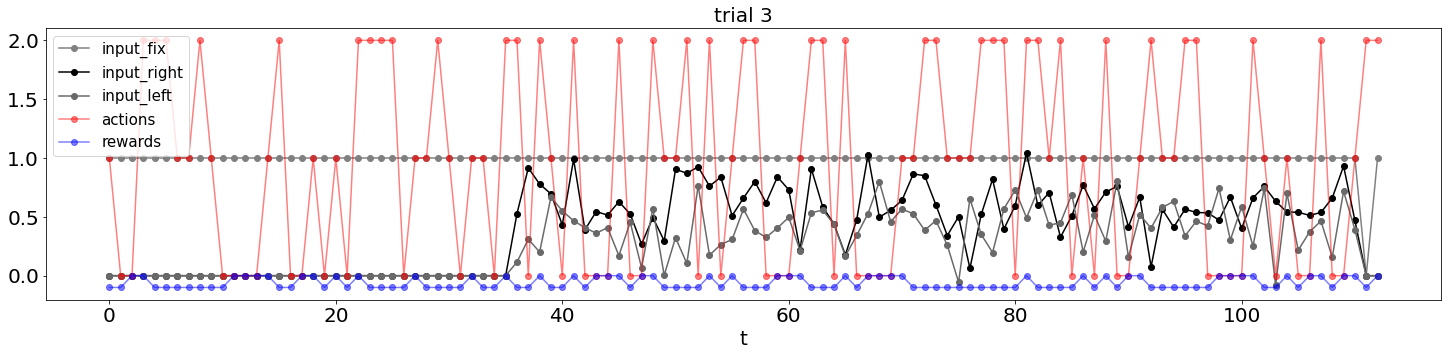

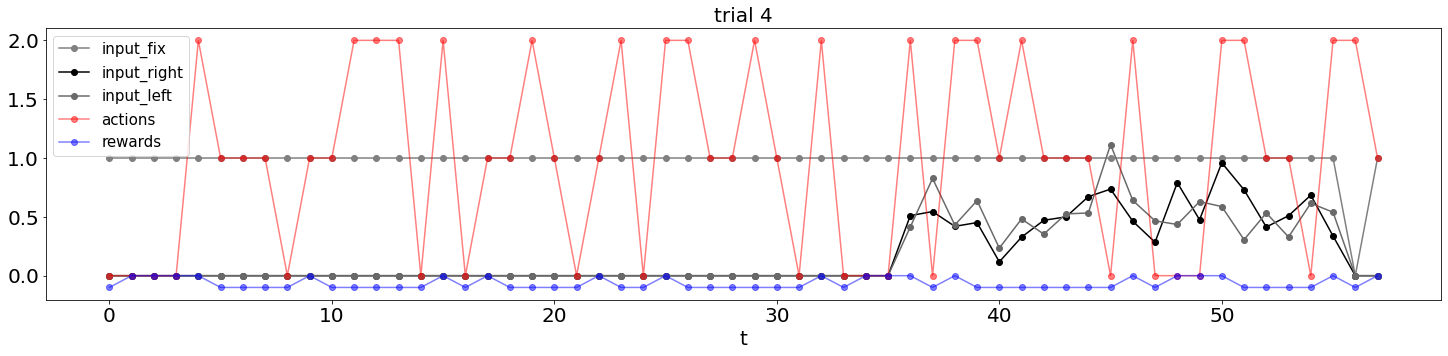

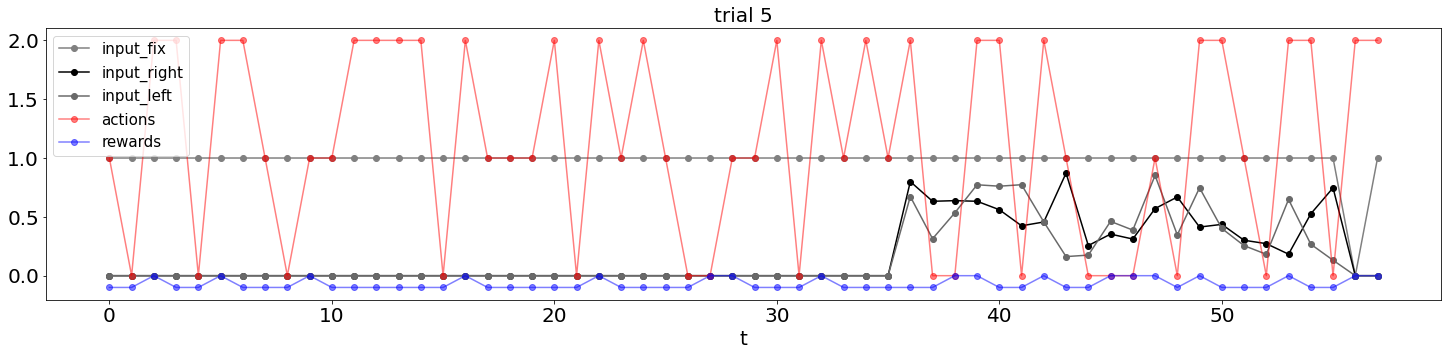

In [19]:
print(trial_begins)
length = 0
for i in range(5):

    plt.figure(figsize=(25,5))
    
    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])
     
    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="input_right", color="black")
    plt.plot(obs[2][start:stop], "-o", label="input_left", color="dimgray")
    plt.plot(actions[start:stop], "-o", label="actions", color="red", alpha=0.5)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="blue", alpha=0.5)
    #plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    plt.legend(fontsize=15, loc="upper left");